In [396]:
# Install dependencies here
#%pip install matplotlib
#%pip install scikit-image
#%pip install seaborn
#%pip install pytorch torchvision torchaudio pytorch-cuda=11.7 -c pytorch -c nvidia
#pip install torch==1.11.0+cu113 torchvision==0.12.0+cu113 torchaudio==0.11.0 --extra-index-url https://download.pytorch.org/whl/cu113
#%pip install lime
%pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [302]:
# Include your imports here
from torchvision import datasets
from torchvision.transforms import ToTensor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import skimage
from skimage import io
from skimage import transform, filters
import torch
from skimage.feature import hog
import os 
import pickle 
import random 
from torch.utils import data 
from torchvision import transforms
from torch import flatten, optim
import torch.nn as nn


import lime
from lime import lime_image

In [303]:
%matplotlib inline
np.random.seed(0)
mpl.rc("figure", figsize=(12, 12))

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

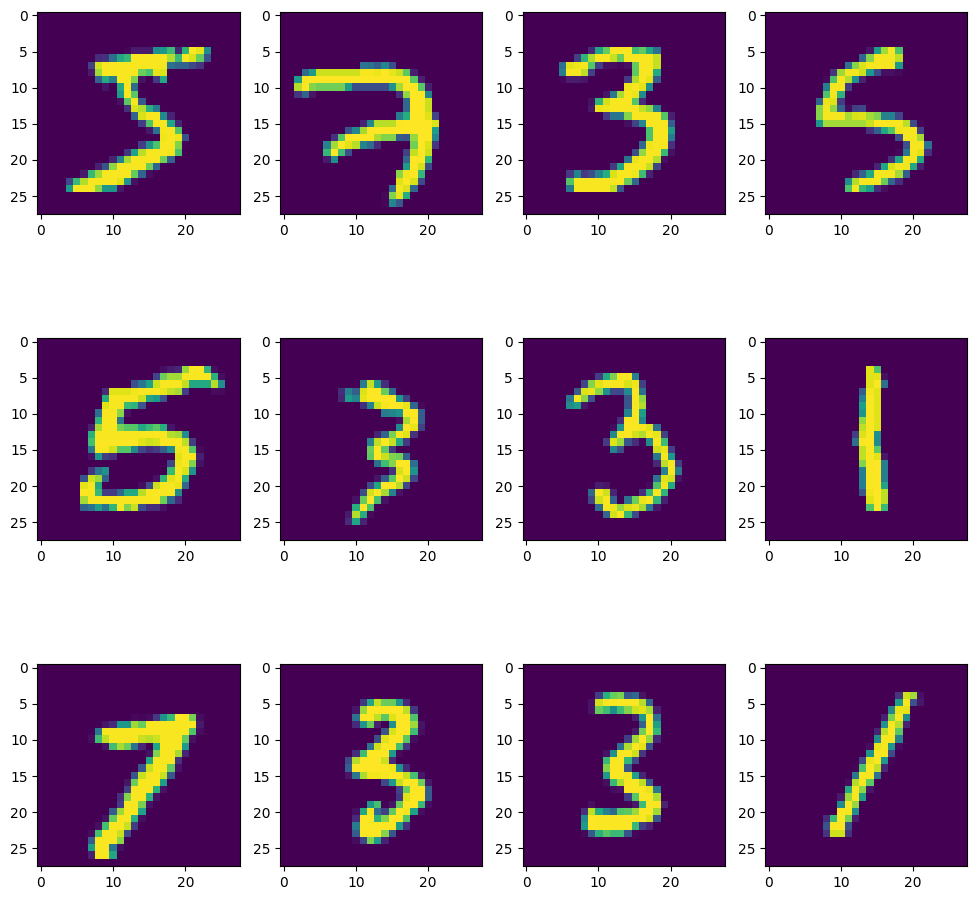

In [304]:
#MODELO RED NEURONAL CONVOLUCIONAL COMPLETO


#PASO 1 - CARGA DE DATOS (Carga de imágenes mediante la libreria de torch.


train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)

  #Visualización de imágenes
im = io.imshow_collection(train_data.data[::5000]) 
print(train_data.data[::5000])

In [441]:
# ----------------------------------------------------------------------------

#PASO 2 - PREPARACIÓN DATOS CON DATALOADER
#https://medium.com/@nutanbhogendrasharma/pytorch-convolutional-neural-network-with-mnist-dataset-4e8a4265e118

#2.1  USo de DataLoader para incluirlo en la red convolucional e inclusion dle hiperparametro batch_size.

loaders_mnist = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
}
loaders_mnist



{'train': <torch.utils.data.dataloader.DataLoader at 0x1b55b1e6ce0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x1b55b1e4af0>}

In [443]:
# ----------------------------------------------------------------------------

#PASO 3 - CREACIÓN RED NEURONAL CONVOLUCIONAL

#3.1 DEFINICIÓN ESTRUCTURA DE RED
  #import torch.mm as nn to simplify. 


class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.MaxPool2d(2),
            nn.LeakyReLU()
        )
        self.relu1 = nn.LeakyReLU()
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.MaxPool2d(2),
            nn.LeakyReLU()
        )
        self.relu2 = nn.LeakyReLU()
        self.out = nn.Linear(32 * 7 * 7, 10)

        
    # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)
   
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x
    
#3.2 DEFINICIÓN ESTRUCTURA DE RED
  #Muestra de 
cnn_mnist = CNNModel()
print(cnn)


CNNModel(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): LeakyReLU(negative_slope=0.01)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): LeakyReLU(negative_slope=0.01)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [307]:
#3.3 DEFINICIÓN DE LA FUNCION DE PERDIDA
loss_func = nn.CrossEntropyLoss()

#3.4 DEFINICIÓN DE LA FUNCION DE OPTIMZACION
# Set up de los hiperparametros del optimizador

optimizer = optim.Adam(cnn_mnist.parameters(), weight_decay=0.008, lr = 0.0002)   
optimizer


Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0002
    maximize: False
    weight_decay: 0.008
)

In [308]:
# ----------------------------------------------------------------------------

#PASO 4 - RESULTADOS

#Función de entrenamiento


from torch.autograd import Variable
num_epochs = 10
def train(num_epochs, cnn, loaders):
    
    cnn.train()
        
    # Train the model
    total_step = len(loaders['train'])
        
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y
            output = cnn(b_x)[0]               
            loss = loss_func(output, b_y)
            
            # clear gradients for this training step   
            optimizer.zero_grad()           
            
            # backpropagation, compute gradients 
            loss.backward()    
            # apply gradients             
            optimizer.step()                
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
            pass
        
        pass
    
    
    pass
train(num_epochs, cnn_mnist, loaders_mnist)

Epoch [1/10], Step [100/600], Loss: 0.7919
Epoch [1/10], Step [200/600], Loss: 0.4607
Epoch [1/10], Step [300/600], Loss: 0.2783
Epoch [1/10], Step [400/600], Loss: 0.4131
Epoch [1/10], Step [500/600], Loss: 0.1528
Epoch [1/10], Step [600/600], Loss: 0.1412
Epoch [2/10], Step [100/600], Loss: 0.2341
Epoch [2/10], Step [200/600], Loss: 0.1626
Epoch [2/10], Step [300/600], Loss: 0.2220
Epoch [2/10], Step [400/600], Loss: 0.2372
Epoch [2/10], Step [500/600], Loss: 0.1815
Epoch [2/10], Step [600/600], Loss: 0.1592
Epoch [3/10], Step [100/600], Loss: 0.1857
Epoch [3/10], Step [200/600], Loss: 0.2402
Epoch [3/10], Step [300/600], Loss: 0.2118
Epoch [3/10], Step [400/600], Loss: 0.1262
Epoch [3/10], Step [500/600], Loss: 0.2023
Epoch [3/10], Step [600/600], Loss: 0.1246
Epoch [4/10], Step [100/600], Loss: 0.1340
Epoch [4/10], Step [200/600], Loss: 0.1612
Epoch [4/10], Step [300/600], Loss: 0.0318
Epoch [4/10], Step [400/600], Loss: 0.0723
Epoch [4/10], Step [500/600], Loss: 0.0877
Epoch [4/10

In [309]:
# ----------------------------------------------------------------------------

#PASO 4 - Evaluacion del modelo con test

#Función de test
def test():
    # Test the model
    cnn_mnist.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders_mnist['test']:
            test_output, last_layer = cnn_mnist(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            pass
        print('Test Accuracy of the model on the 10000 test}: %.2f' % accuracy)
    
    pass
test()

Test Accuracy of the model on the 10000 test}: 0.97


In [310]:
sample = next(iter(loaders_mnist['test']))
imgs, lbls = sample

actual_number = lbls[:20].numpy()

test_output, last_layer = cnn_mnist(imgs[:20])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(f'Prediction number: {pred_y}')
print(f'Actual number: {actual_number}')

Prediction number: [2 6 0 3 5 2 8 5 2 1 4 1 2 1 0 5 4 4 8 8]
Actual number: [2 6 0 3 5 2 8 5 2 1 4 1 2 1 0 5 4 4 8 8]


In [311]:
print(pred_y)

[2 6 0 3 5 2 8 5 2 1 4 1 2 1 0 5 4 4 8 8]


LIME

In [415]:
from skimage import transform
def centro(imm):
    immn = np.array(imm)
    Xcm, Ycm = np.meshgrid(range(immn.shape[0]), range(immn.shape[1]))
    xcm = int(np.round(np.sum((Xcm*immn.T)[:]) / np.sum(immn[:])))
    ycm = int(np.round(np.sum((Ycm*immn.T)[:]) / np.sum(immn[:])))
    return (xcm, ycm)
    
def preparar(imm):
    im_bw = 1.0 - (np.mean(imm, axis=2) / 255.0)
    #im_bw = imm[:,:,2]/np.sum(imm,axis=2)
    im_bw /= np.max(im_bw)
    mask = im_bw > 0.5
    im_bwm = np.array(im_bw)
    im_bwm[~mask] = 0.0
    
    nnz_x = np.nonzero(np.sum(mask, axis=1))[0]
    nnz_y = np.nonzero(np.sum(mask, axis=0))[0]
    xcm, ycm = centro(im_bwm)
    box = int(np.max([abs(nnz_x[0]-xcm),abs(nnz_x[-1]-xcm),abs(nnz_y[0]-ycm),abs(nnz_y[-1]-ycm)])*1.25)

    im_bw[im_bw < 0.3] = 0.0
    im_bw = im_bw[(xcm-box):(xcm+box), (ycm-box):(ycm+box)]
    im_bw = transform.resize(image=im_bw, output_shape=(28,28), anti_aliasing=True, mode='reflect')
    im_bw /= np.max(im_bw)
    im_bw[im_bw>0.0]*=10.0
    im_bw[im_bw>1.0]=1.0
    im_bw = (255*im_bw).astype('uint8')
    return im_bw[np.newaxis,:,:]


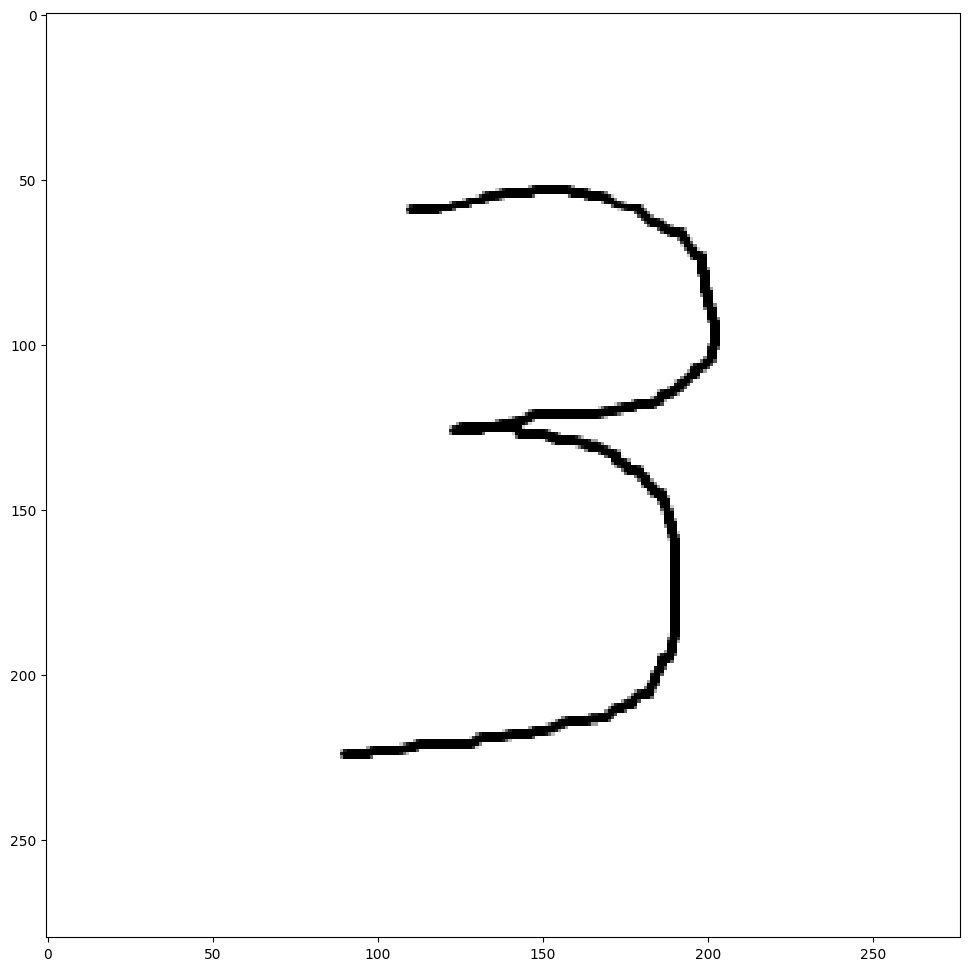

In [416]:
def get_image(path):
    with open(os.path.abspath(path), 'rb') as f:
        with Image.open(f) as img:
            return img.convert('RGB') 


img = get_image('output.png')
plt.imshow(img)


img2 = preparar(img)

In [456]:
img = test_data.data[0].unsqueeze(0).unsqueeze(0).float() / 255.0


# Convertir imagen en escala de grises a imagen RGB
def grayscale_to_rgb(img_gray):
    img_rgb = torch.cat((img_gray, img_gray, img_gray), dim=0)
    return img_rgb

# Ejemplo de uso

img_rgb = grayscale_to_rgb(img2)
print(img_rgb.shape)  # Salida: torch.Size([3, 3, 3])


# 3. Implementación de LIME
explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(img2, cnn_mnist, num_samples=1000, top_labels=1)





ValueError: Only RGB images can be converted to Lab space.

In [477]:
import lime
from lime import lime_tabular
import numpy as np

# Preparar los datos para lime_tabular
X_train = train_data.data.view(-1, 28*28).numpy()
y_train = train_data.targets.numpy()

# Ajustar la forma de X_test si es necesario
X_test = X_test.view(-1, 28*28)

# Crear una función convert_and_round modificada
@staticmethod
def convert_and_round(values):
    if isinstance(values, np.ndarray):
        values = values.flatten()
    return np.round(values, decimals=2).tolist()

# Crear un modelo de clasificación para lime_tabular
def predict_fn(X):
    X = X.reshape(-1, 1, 28, 28)  # Reajustar a la forma de imagen
    X = torch.from_numpy(X).float()
    cnn_mnist.eval()
    with torch.no_grad():
        predictions, _ = cnn_mnist(X)
    return predictions.numpy()

# Crear un explicador lime_tabular
explainer = lime_tabular.LimeTabularExplainer(X_train, feature_names=None, class_names=None, discretize_continuous=False)

# Definir una función auxiliar para redondear los valores
def convert_and_round(values):
    if isinstance(values, np.ndarray):
        return np.round(values, decimals=2)
    elif isinstance(values, list):
        return [round(v, 2) for v in values]
    else:
        return values

# Reemplazar el método convert_and_round en explainer con la versión modificada
explainer.convert_and_round = convert_and_round

# Explicar una instancia
explanation = explainer.explain_instance(X_test.numpy(), predict_fn, num_features=10)

# Imprimir la explicación
print(explanation.as_list())

[('739', -0.5581592822101994), ('232', 0.45425249129069145), ('203', 0.4152286516726384), ('231', 0.30238287860717167), ('740', -0.23262866476220584), ('713', 0.22676140727996755), ('230', 0.18440516377190072), ('738', 0.16135653853920554), ('712', 0.11275791533656654), ('711', 0.07628167744701655)]


c:\Users\Me\AppData\Local\Programs\Python\Python310\lib\site-packages\lime\lime_tabular.py:372: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  warnings.warn("""


In [489]:
import matplotlib.pyplot as plt

# Obtener las características importantes y sus pesos
features = explanation.as_list()
feature_names = [f[0] for f in features]
weights = [f[1] for f in features]

# Crear una imagen a partir de los pesos
image = np.zeros((28, 28))
for feature, weight in zip(feature_names, weights):
    row, col = feature // 28, feature % 28
    image[row, col] = weight

# Mostrar la imagen
plt.imshow(image, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Importancia de los Píxeles')
plt.show()

TypeError: unsupported operand type(s) for //: 'str' and 'int'